In [89]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt

In [92]:
base_dir = 'C://Users//User//Desktop//backup[s//1-19-2023//mnc-pt-pyrid//results//'
os.chdir(base_dir)
data = json.load(open('all_data.json'))
save_dir = 'C://Users//User//PycharmProjects//Musgrave_scripts//BenRich//json_plots//mnc-pt-pyrid//'

In [103]:
xs = [1,2,3,4]
def delta_G(surf, adsorbate, bias, site, nrg_type, data):
    gf = data[surf]['adsorbed'][adsorbate][bias][site]['Ecomponents'][nrg_type]
    gi_1 = data[surf]['surf'][bias]['Ecomponents'][nrg_type]
    gi_2 = data[adsorbate][bias]['Ecomponents'][nrg_type]
    return gf - (gi_1 + gi_2)

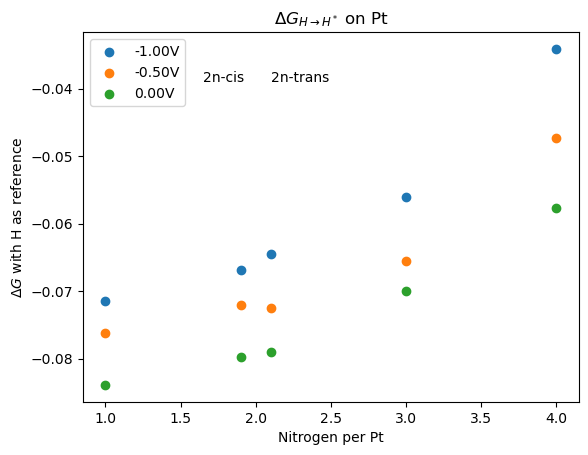

In [104]:
ys_deltaG = []
surfs = ['1n', '2n-cis', '2n-trans', '3n', '4n']
xs = [1,1.9,2.1,3,4]
biases = ['-1.00V', '-0.50V', '0.00V']
for b in biases:
    ys_deltaG.append([])
    for s in surfs:
        ys_deltaG[-1].append(delta_G(s, 'H', b, '01', 'G', data))
for i in range(len(biases)):
    plt.scatter(xs, ys_deltaG[i], label=biases[i])
plt.title(r'$\Delta G_{H\rightarrow H^*}$ on Pt')
plt.legend()
plt.xlabel('Nitrogen per Pt')
plt.ylabel(r'$\Delta G$ with H as reference')
plt.text(1.65, -0.039, surfs[1])
plt.text(2.1, -0.039, surfs[2])
plt.savefig(save_dir + 'H-on-Pt_wrt-nN.png')

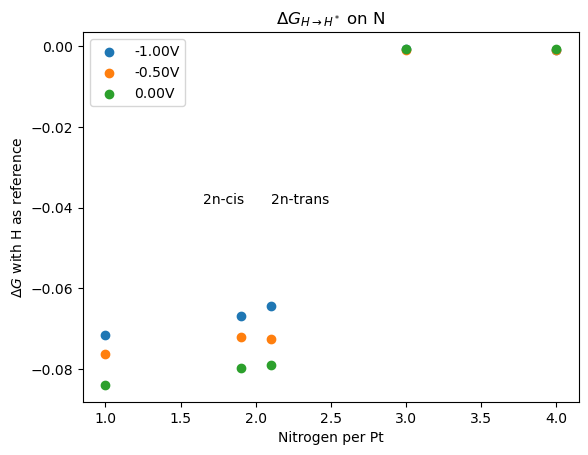

In [105]:
ys_deltaG = []
surfs = ['1n', '2n-cis', '2n-trans', '3n', '4n']
biases = ['-1.00V', '-0.50V', '0.00V']
xs = [1,1.9,2.1,3,4]
for b in biases:
    ys_deltaG.append([])
    for s in surfs:
        ys_deltaG[-1].append(delta_G(s, 'H', b, '02', 'G', data))
for i in range(len(biases)):
    plt.scatter(xs, ys_deltaG[i], label=biases[i])
plt.title(r'$\Delta G_{H\rightarrow H^*}$ on N')
plt.legend()
plt.xlabel('Nitrogen per Pt')
plt.ylabel(r'$\Delta G$ with H as reference')
plt.text(1.65, -0.039, surfs[1])
plt.text(2.1, -0.039, surfs[2])
plt.savefig(save_dir + 'H-on-N_wrt-nN.png')

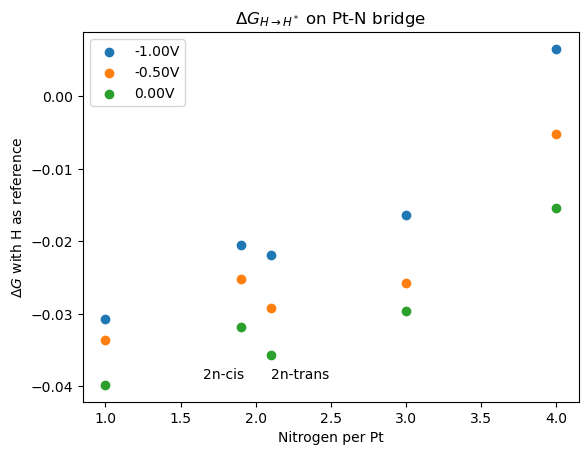

In [106]:
plt.ylabel(r'$\Delta G$ with H as reference')
ys_deltaG = []
surfs = ['1n', '2n-cis', '2n-trans', '3n', '4n']
biases = ['-1.00V', '-0.50V', '0.00V']
xs = [1,1.9,2.1,3,4]
for b in biases:
    ys_deltaG.append([])
    for s in surfs:
        ys_deltaG[-1].append(delta_G(s, 'H', b, '03', 'G', data))
for i in range(len(biases)):
    plt.scatter(xs, ys_deltaG[i], label=biases[i])
plt.title(r'$\Delta G_{H\rightarrow H^*}$ on Pt-N bridge')
plt.legend()
plt.xlabel('Nitrogen per Pt')
plt.ylabel(r'$\Delta G$ with H as reference')
plt.text(1.65, -0.039, surfs[1])
plt.text(2.1, -0.039, surfs[2])
plt.savefig(save_dir + 'H-on-Pt-N_wrt-nN.png')

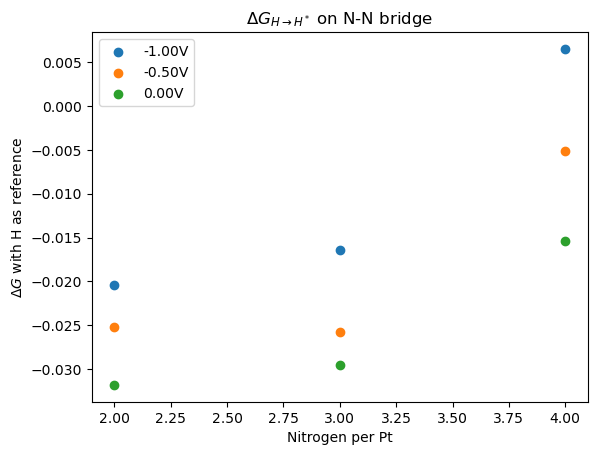

In [107]:
ys_deltaG = []
surfs = ['2n-cis', '3n', '4n']
xs = [2,3,4]
biases = ['-1.00V', '-0.50V', '0.00V']
for b in biases:
    ys_deltaG.append([])
    for s in surfs:
        ys_deltaG[-1].append(delta_G(s, 'H', b, '03', 'G', data))
for i in range(len(biases)):
    plt.scatter(xs, ys_deltaG[i], label=biases[i])
plt.title(r'$\Delta G_{H\rightarrow H^*}$ on N-N bridge')
plt.legend()
plt.xlabel('Nitrogen per Pt')
plt.ylabel(r'$\Delta G$ with H as reference')
plt.savefig(save_dir + 'H-on-N-N_wrt-nN.png')

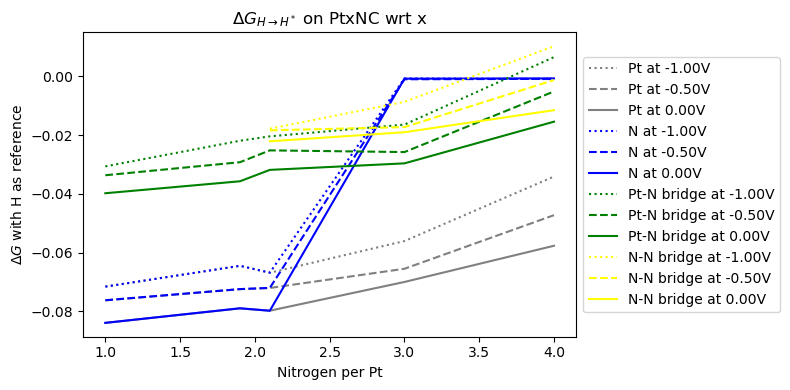

In [133]:
surfs = ['1n','2n-trans','2n-cis','3n','4n']
xs = [1,1.9,2.1,3,4]
biases = ['-1.00V', '-0.50V', '0.00V']
sites = [['01', 'Pt'],['02', 'N'],['03', 'Pt-N bridge'],['04','N-N bridge']]

colors = {
    sites[0][0]: 'grey',
    sites[1][0]: 'blue',
    sites[2][0]: 'green',
    sites[3][0]: 'yellow'
}

linestyles = {
    biases[1]: 'dashed',
    biases[0]: 'dotted',
    biases[2]: 'solid'
}


ys = []
xs_plot = []
for site in sites:
    for b in biases:
        ys.append([])
        if site[0] == '04':
            surf_use = surfs[2:]
            xs_use = xs[2:]
        else:
            surf_use = surfs
            xs_use = xs

        for surf in surf_use:
            ys[-1].append(delta_G(surf, 'H', b, site[0], 'G', data))
        xs_plot.append(xs_use)

plt_1 = plt.figure(figsize=(8, 4))
for i in range(len(sites)):
    for j in range(len(biases)):
        plt.plot(xs_plot[i*len(biases) + j], ys[i*len(biases) + j], label = sites[i][1] + ' at ' + biases[j], color=colors[sites[i][0]], linestyle=linestyles[biases[j]])


plt.title(r'$\Delta G_{H\rightarrow H^*}$ on PtxNC wrt x')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Nitrogen per Pt')
plt.ylabel(r'$\Delta G$ with H as reference')
plt.tight_layout()
plt.savefig(save_dir + 'H-on-allsites_wrt_nN.png')

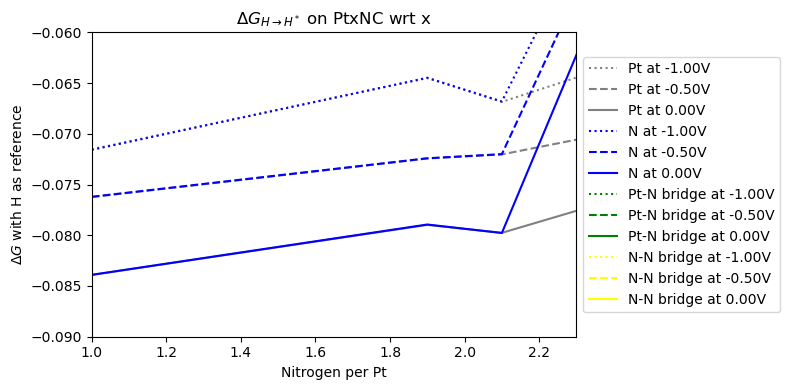

In [134]:
surfs = ['1n','2n-trans','2n-cis','3n','4n']
xs = [1,1.9,2.1,3,4]
biases = ['-1.00V', '-0.50V', '0.00V']
sites = [['01', 'Pt'],['02', 'N'],['03', 'Pt-N bridge'],['04','N-N bridge']]

colors = {
    sites[0][0]: 'grey',
    sites[1][0]: 'blue',
    sites[2][0]: 'green',
    sites[3][0]: 'yellow'
}

linestyles = {
    biases[1]: 'dashed',
    biases[0]: 'dotted',
    biases[2]: 'solid'
}


ys = []
xs_plot = []
for site in sites:
    for b in biases:
        ys.append([])
        if site[0] == '04':
            surf_use = surfs[2:]
            xs_use = xs[2:]
        else:
            surf_use = surfs
            xs_use = xs

        for surf in surf_use:
            ys[-1].append(delta_G(surf, 'H', b, site[0], 'G', data))
        xs_plot.append(xs_use)

plt_1 = plt.figure(figsize=(8, 4))
for i in range(len(sites)):
    for j in range(len(biases)):
        plt.plot(xs_plot[i*len(biases) + j], ys[i*len(biases) + j], label = sites[i][1] + ' at ' + biases[j], color=colors[sites[i][0]], linestyle=linestyles[biases[j]])


plt.title(r'$\Delta G_{H\rightarrow H^*}$ on PtxNC wrt x')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Nitrogen per Pt')
plt.ylabel(r'$\Delta G$ with H as reference')
plt.xlim(1, 2.3)
plt.ylim(-0.09, -0.06)
plt.tight_layout()
plt.savefig(save_dir + 'H-on-allsites_wrt_nN_zoom.png')